In [333]:

%matplotlib inline
from copy import deepcopy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from copy import deepcopy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from random import *

import math
# Importing the dataset

#http://eneskemalergin.github.io/blog//blog/Fuzzy_Clustering/



In [334]:
file = pd.read_csv('BSOM_DataSet_revised.csv')
data=file[['all_NBME_avg_n4', 'all_PIs_avg_n131', 'HD_final']]

X=np.array(data)
print(data.shape)
data.head()

print(X.shape)



(115, 3)
(115, 3)


In [335]:
# Number of Clusters
clusters = 3


# Number of data points
n = len(data)
print(n)


# Fuzzy parameter
fuzzifier = 2.00


115


In [336]:
# random centroids generation

C0 = np.random.uniform(0.4,1.0,size=clusters)
C1 = np.random.uniform(0.6,1.0,size=clusters)
C2 = np.random.uniform(0.7,1.0,size=clusters)

Centroids = np.array(list(zip(C0,C1,C2)))
print(Centroids)
#Centroids=np.array(data.sample(3))
#print('Centroids',Centroids[0])

[[0.84256584 0.88211176 0.74614928]
 [0.6794155  0.83998683 0.79748726]
 [0.86374003 0.8634483  0.75676146]]


In [337]:
# Euclidean Distance Caculator
# Euclidean Distance Caculator

def dist(a,b):
        sum = 0
        for m in range(len(a)):
            for n in range(len(b)):

                sum  += ((a[m][n] - b[m][n]))**2

        ed = math.sqrt(sum)
        return ed

In [338]:
total_weights=[]
c_updated=[]
error = 10
c_old = Centroids
while (error > 0.2):
    
    for i in range(n):
        weights=[]# weights of points for all the clusters 
        for w in range(3):
            w0=(dist(X[[i]],Centroids[[w]])/dist(X[[i]],Centroids[[0]]))**fuzzifier
            #print('w0',w0)

            w1=(dist(X[[i]],Centroids[[w]])/dist(X[[i]],Centroids[[1]]))**fuzzifier
            #print('w1',w1)
            w2=(dist(X[[i]],Centroids[[w]])/dist(X[[i]],Centroids[[2]]))**fuzzifier
            #print('w2',w2)
            sum_val=w0+w1+w2
                #print('sum_val',sum_val)

                #print('sqr_sum',sqr_sum)
            finl_weights=1/sum_val
                #print('finl_weights',finl_weights)
            #total_weights.append(finl_weights)
            weights.append(finl_weights)
        total_weights.append(weights)
    #weights1_df=pd.DataFrame(total_weights)
        
        #print('total_weights',total_weights)

    weights_df=pd.DataFrame(total_weights)

    

    #weights_df[0] = weights_df[0].str.get(0)
    #weights_df[1] = weights_df[1].str.get(0)
    #weights_df[2] = weights_df[2].str.get(0)


    for l in range(clusters):
        for v in range(n):# n = num of data points
            product_c0=np.array(weights_df[[l]])*np.array(weights_df[[l]])*X[v]
        product_c0_df=pd.DataFrame(product_c0)
        #print('product_c0_df',product_c0_df)
        productSum_df_c0=np.array(product_c0_df.sum(axis = 0))/np.sum(weights_df[l])
        print('productSum_df_c0',productSum_df_c0)
        #c_updated.append(productSum_df_c0)
        if l==0:
            c0=productSum_df_c0
        if l==1:
            c1=productSum_df_c0
        if l==2:
            c2=productSum_df_c0
    c_updated = np.array(list(zip(c0,c1,c2)))
    
    
    error = dist(c_old,c_updated)
    c_old = c_updated
    
   
    
    
print(error)

#print(c_updated)
print(c_old)
#print('total_weights',total_weights)

print('weights',weights)

print(type(weights))

productSum_df_c0 [0.55179188 0.42614327 0.53099972]
productSum_df_c0 [0.59404352 0.45877378 0.57165927]
productSum_df_c0 [0.55448111 0.42822014 0.53358762]
productSum_df_c0 [0.55179188 0.42614327 0.53099972]
productSum_df_c0 [0.59404352 0.45877378 0.57165927]
productSum_df_c0 [0.55448111 0.42822014 0.53358762]
1.2187194808943674e-15
[[0.55179188 0.59404352 0.55448111]
 [0.42614327 0.45877378 0.42822014]
 [0.53099972 0.57165927 0.53358762]]
weights [0.003854543369290123, 4.56946722744683e-05, 0.9960997619584354]
<class 'list'>


In [339]:
clust_labels=[]
for i in range(len(weights_df)):
    labels_val= np.argmax(np.array(weights_df.iloc[i,:]))
    clust_labels.append(labels_val)
weights_df['Labels']=clust_labels  

print(weights_df['Labels'])


0      0
1      0
2      0
3      2
4      2
5      0
6      1
7      0
8      1
9      2
10     0
11     0
12     2
13     0
14     2
15     0
16     0
17     0
18     1
19     0
20     0
21     1
22     0
23     0
24     2
25     0
26     2
27     2
28     2
29     1
      ..
200    2
201    0
202    0
203    0
204    1
205    2
206    0
207    0
208    2
209    0
210    0
211    1
212    2
213    2
214    1
215    2
216    0
217    2
218    2
219    2
220    0
221    0
222    0
223    1
224    0
225    1
226    0
227    0
228    1
229    2
Name: Labels, Length: 230, dtype: int64


In [340]:
#print(weights_df)
points_list0=[]
points_list1=[]
points_list2=[]

for i in range(len(weights_df[:-115])):
    if (weights_df.iloc[i,-1]==0):
        points_list0.append(X[i])
    if (weights_df.iloc[i,-1]==1):
        points_list1.append(X[i])
    if (weights_df.iloc[i,-1]==2):
        points_list2.append(X[i])
"""
for i in range(len(weights_df[:-115])):
    if (weights_df.iloc[i,-1]==0):
        points_list0.append(np.array(weights_df.iloc[i,:-1]))
    if (weights_df.iloc[i,-1]==1):
        points_list1.append(np.array(weights_df.iloc[i,:-1]))
    if (weights_df.iloc[i,-1]==2):
        points_list2.append(np.array(weights_df.iloc[i,:-1]))

print('points_list0',points_list0)
print(len(points_list0))
print(len(points_list1))
print(len(points_list2))
#print('points_list1',points_list1)
#print('points_list2',points_list2)
points_list0.append(X[i])
    if (weights_df.iloc[i,-1]==1):
        points_list1.append(X[i])
    if (weights_df.iloc[i,-1]==2):
        points_list2.append(X[i])

"""

"\nfor i in range(len(weights_df[:-115])):\n    if (weights_df.iloc[i,-1]==0):\n        points_list0.append(np.array(weights_df.iloc[i,:-1]))\n    if (weights_df.iloc[i,-1]==1):\n        points_list1.append(np.array(weights_df.iloc[i,:-1]))\n    if (weights_df.iloc[i,-1]==2):\n        points_list2.append(np.array(weights_df.iloc[i,:-1]))\n\nprint('points_list0',points_list0)\nprint(len(points_list0))\nprint(len(points_list1))\nprint(len(points_list2))\n#print('points_list1',points_list1)\n#print('points_list2',points_list2)\npoints_list0.append(X[i])\n    if (weights_df.iloc[i,-1]==1):\n        points_list1.append(X[i])\n    if (weights_df.iloc[i,-1]==2):\n        points_list2.append(X[i])\n\n"

In [341]:
points_list3=[]
points_list3.append(points_list0 )
points_list3.append(points_list1 )
points_list3.append(points_list2 )



In [342]:


#------------------------- For k=3 DB index values------------------------


def euc_dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


Si3_dist=[i for i in range(len(points_list3))]

Si3_final=[]


          
for each in range(len(points_list3)):
    #print(each)
    
    for si in points_list3[each]:
        
        Si3=euc_dist(si, c_updated[[each]]) 
        
        Si3_dist.append(Si3)
        #print(Si3_dist)
    Si3_= (1/len(points_list3[each]))*np.sum(Si3_dist)
    
    Si3_final.append(Si3_)

#print('Si3_dist',Si3_dist)
print('Si3_final',Si3_final)   
 

C3_12=euc_dist(c_updated[[0]],c_updated[[1]])
#print('C3_12',C3_12)
C3_13=euc_dist(c_updated[[0]],c_updated[[2]])
#print('C3_13',C3_13)
C3_23=euc_dist(c_updated[[1]],c_updated[[2]])
#print('C3_23',C3_23)




R3_12= (Si3_final[0]+Si3_final[1])/C3_12 #(S_i+S_j)/M_ij
R3_13= (Si3_final[0]+Si3_final[2])/C3_13 #(S_i+S_j)/M_ij
R3_23= (Si3_final[1]+Si3_final[2])/C3_13 #(S_i+S_j)/M_ij

max_C3_R1=max(R3_12,R3_13)
max_C3_R2=max(R3_12,R3_23)
max_C3_R3=max(R3_13,R3_23)


D3_i=max(max_C3_R1,max_C3_R2,max_C3_R3)


DB_3=(D3_i)/3
        
print('DB value for k=3 with 3 features by using Fuzzy logic  is ',DB_3) 


Si3_final [0.45179621119591373, 1.448584237250254, 1.5011567480189913]
DB value for k=3 with 3 features by using Fuzzy logic  is  [26.56545043]


In [345]:
points_list3_df=pd.DataFrame(points_list3)

points_list3_df.T[0]

0       [0.77, 0.6623, 0.95]
1        [0.8, 0.6107, 0.84]
2     [0.8125, 0.6798, 0.88]
3      [0.775, 0.6431, 0.84]
4      [0.7925, 0.5844, 0.9]
5     [0.8525, 0.6467, 0.84]
6        [0.81, 0.5585, 0.8]
7       [0.79, 0.6179, 0.75]
8     [0.7775, 0.5933, 0.83]
9      [0.795, 0.6096, 0.81]
10      [0.84, 0.7039, 0.83]
11     [0.8375, 0.653, 0.91]
12    [0.8175, 0.6864, 0.91]
13       [0.81, 0.673, 0.93]
14    [0.8475, 0.7063, 0.92]
15    [0.8475, 0.6588, 0.79]
16      [0.77, 0.5578, 0.85]
17      [0.84, 0.7004, 0.92]
18    [0.8375, 0.6576, 0.86]
19      [0.77, 0.6186, 0.77]
20     [0.765, 0.6073, 0.87]
21      [0.83, 0.5764, 0.79]
22     [0.8075, 0.6134, 0.8]
23     [0.805, 0.6529, 0.87]
24       [0.8, 0.6463, 0.83]
25    [0.7875, 0.6463, 0.82]
26    [0.8475, 0.6914, 0.83]
27     [0.815, 0.6551, 0.69]
28     [0.8075, 0.6957, 0.9]
29     [0.8075, 0.6321, 0.8]
30    [0.7625, 0.5984, 0.74]
31    [0.8425, 0.6669, 0.92]
32    [0.8275, 0.5658, 0.79]
33      [0.78, 0.5706, 0.74]
34    [0.8175,

ValueError: setting an array element with a sequence.

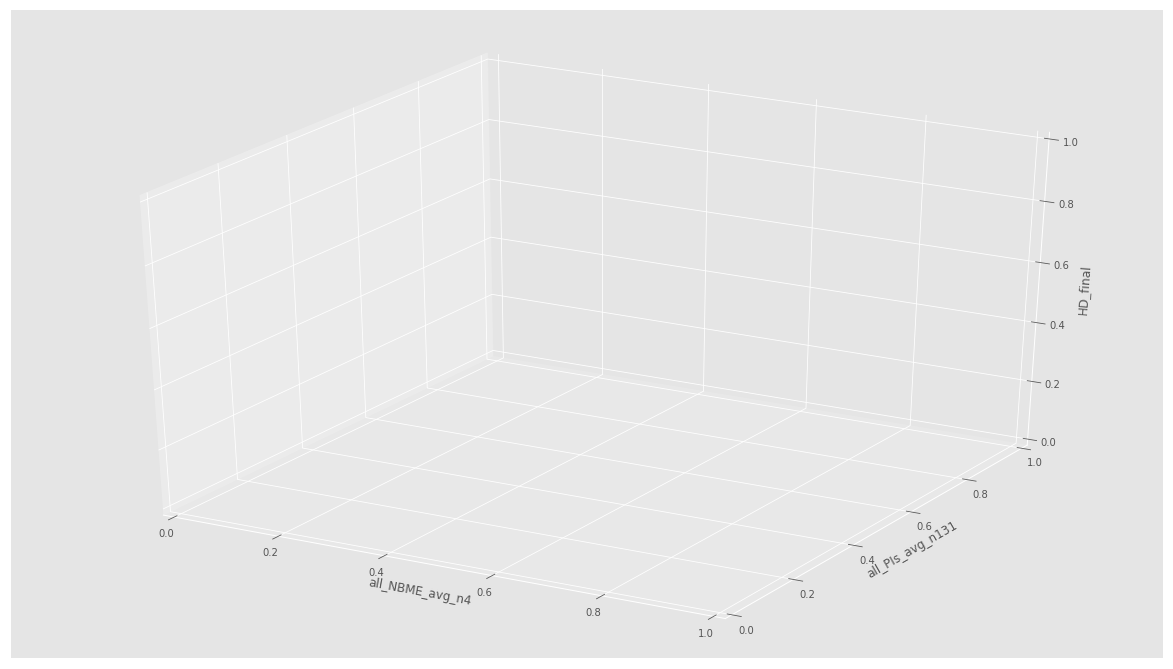

In [346]:
colors = ['r', 'g', 'b', 'y', 'c', 'm','k','#30a2da','#009E73','#CC79A7']
        #fig, ax = plt.subplots()
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('all_NBME_avg_n4')
ax.set_ylabel('all_PIs_avg_n131')
ax.set_zlabel('HD_final')
        
      
for i in range(3):       
    ax.scatter(points_list3_df.T[0], points_list3_df.T[1],points_list3_df.T[2],c= colors[i])
    ax.scatter(c_updated[0], c_updated[1], c_updated[2] ,marker='^',  c='red')
        

,0,1,2
0,"[0.77, 0.6623, 0.95]","[0.715, 0.5491, 0.69]","[0.925, 0.7652, 0.91]"
1,"[0.8, 0.6107, 0.84]","[0.74, 0.555, 0.74]","[0.855, 0.6772, 0.83]"
2,"[0.8125, 0.6798, 0.88]","[0.74, 0.5915, 0.7]","[0.875, 0.7352, 0.93]"
3,"[0.775, 0.6431, 0.84]","[0.615, 0.5038, 0.64]","[0.8875, 0.7719, 0.95]"
4,"[0.7925, 0.5844, 0.9]","[0.7125, 0.5423, 0.63]","[0.88, 0.7, 0.95]"
5,"[0.8525, 0.6467, 0.84]","[0.74, 0.5248, 0.73]","[0.895, 0.7147, 0.95]"
6,"[0.81, 0.5585, 0.8]","[0.745, 0.6245, 0.8]","[0.9125, 0.772, 0.98]"
7,"[0.79, 0.6179, 0.75]","[0.7, 0.5272, 0.54]","[0.86, 0.7453, 0.92]"
8,"[0.7775, 0.5933, 0.83]","[0.71, 0.5136, 0.68]","[0.9275, 0.7967, 0.96]"
9,"[0.795, 0.6096, 0.81]","[0.71, 0.512, 0.74]","[0.86, 0.7175, 0.99]"
